In [67]:
print("womp womp")

womp womp
time: 0 ns (started: 2023-12-14 19:50:42 -05:00)


In [68]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
from collections import OrderedDict
from torchvision import datasets
from torchvision import transforms
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 16 ms (started: 2023-12-14 19:50:42 -05:00)


In [69]:
file_path = r"C:\Users\aaron\Documents\Python Code\Datasets\Heart Attack Risk Predicition\heart_attack_prediction_dataset.csv"

heart_attack = pd.read_csv(file_path)

heart_attack.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


time: 31 ms (started: 2023-12-14 19:50:42 -05:00)


In [70]:
#Defining mapping function to map multiple inputs of the dataset
def gender_map(x):
    return x.map({'M': 1, 'F': 0, 'Male' : 1, "Female" : 0, '1' : 1, '0' : 0})

def hemisphere_map(x):
    return x.map({'Southern Hemisphere' : -1, 'Northern Hemisphere' : 1})

def countries_map(x):
    return x.map({'Argentina' : -1, 'Brazil' : -1, 'China' : -1, 'Colombia' : -1,
    'India' : -1, 'Nigeria' : -1, 'South Africa' : -1, 'South Korea' : -1, 'Thailand' : -1,
    'Vietnam' : -1, 'Australia' : 1, 'Canada' : 1, 'France' : 1, 'Germany' : 1,
    'Italy' : 1, 'Japan' : 1, 'New Zealand' : 1, 'Spain' : 1, 'United Kingdom' : 1,
    'United States' : 1})

def diet_map(x):
    return x.map({'Unhealthy' : -1, 'Average' : 0, 'Healthy' : 1})

def continent_map(x):
    return x.map({'Asia' : 0, 'Africa' : 1, 'Europe' : 2, 'North America' : 3,
    'South America' : 4, 'Australia' : 5})

time: 0 ns (started: 2023-12-14 19:50:42 -05:00)


In [71]:
heart_attack['Sex'] = heart_attack[['Sex']].apply(gender_map)
heart_attack['Hemisphere'] = heart_attack[['Hemisphere']].apply(hemisphere_map)
heart_attack['Country'] = heart_attack[['Country']].apply(countries_map)
heart_attack['Diet'] = heart_attack[['Diet']].apply(diet_map)
heart_attack['Continent'] = heart_attack[['Continent']].apply(continent_map)

unique_sex = heart_attack['Sex'].unique()
print(unique_sex)
unique = heart_attack['Hemisphere'].unique()
print(unique)
unique_country = heart_attack['Country'].unique()
print(unique_country)
unique_diet = heart_attack['Diet'].unique()
print(unique_diet)
unique_continent = heart_attack['Continent'].unique()
print(unique_continent)

heart_attack.head()

[1 0]
[-1  1]
[-1  1]
[ 0 -1  1]
[4 3 2 0 1 5]


,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,1,208,158,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,-1,4,-1,0
1,21,1,389,165,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,1,3,1,0
2,21,0,324,174,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,1,2,1,0
3,84,1,383,163,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,1,3,1,0
4,66,1,318,91,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,-1,0,1,0


time: 15 ms (started: 2023-12-14 19:50:42 -05:00)


In [72]:
# Extract 4 shared features between all datasets and target
shared_col = ['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Attack Risk']
X = heart_attack[shared_col].values

print(X[:5])

[[ 67   1 208 158   0]
 [ 21   1 389 165   0]
 [ 21   0 324 174   0]
 [ 84   1 383 163   0]
 [ 66   1 318  91   0]]
time: 0 ns (started: 2023-12-14 19:50:42 -05:00)


In [73]:
# Setting up variables for training

y_diab = heart_attack[['Diabetes']].values.reshape(-1, 1)
y_obesity = heart_attack[['Obesity']].values.reshape(-1, 1)
y_alcCon = heart_attack[['Alcohol Consumption']].values.reshape(-1, 1)
y_ExHrsPrWk = heart_attack[['Exercise Hours Per Week']].values.reshape(-1, 1)
y_diet = heart_attack[['Diet']].values.reshape(-1, 1)
y_previousHeartProb = heart_attack[['Previous Heart Problems']].values.reshape(-1, 1)
y_continent = heart_attack[['Continent']].values.reshape(-1, 1)
y_hr = heart_attack['Heart Rate'].values.reshape(-1, 1)
y_famHist = heart_attack['Family History'].values.reshape(-1, 1)
y_smoking = heart_attack['Smoking'].values.reshape(-1, 1)
y_hemis = heart_attack['Hemisphere'].values.reshape(-1, 1)
y_medUse = heart_attack['Medication Use'].values.reshape(-1, 1)
y_stressLvl = heart_attack['Stress Level'].values.reshape(-1, 1)
y_sedHrs = heart_attack['Sedentary Hours Per Day'].values.reshape(-1, 1)
y_income = heart_attack['Income'].values.reshape(-1, 1)
y_bmi = heart_attack['BMI'].values.reshape(-1, 1)
y_trig = heart_attack['Triglycerides'].values.reshape(-1, 1)
y_phyDays = heart_attack['Physical Activity Days Per Week'].values.reshape(-1, 1)
y_sleepHrs = heart_attack['Sleep Hours Per Day'].values.reshape(-1, 1)
y_country = heart_attack['Country'].values.reshape(-1, 1)

# Normalize data using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept term to features
X_scaled = np.hstack((np.ones((len(y_diab), 1)), X_scaled))

# Split the data into training and testing sets
X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(X_scaled, y_diab, test_size=0.2, random_state=0)
X_train_obesity, X_test_obesity, y_train_obesity, y_test_obesity = train_test_split(X_scaled, y_obesity, test_size=0.2, random_state=0)
X_train_alcCon, X_test_alcCon, y_train_alcCon, y_test_alcCon = train_test_split(X_scaled, y_alcCon, test_size=0.2, random_state=0)
X_train_ExHrsPrWk, X_test_ExHrsPrWk, y_train_ExHrsPrWk, y_test_ExHrsPrWk = train_test_split(X_scaled, y_ExHrsPrWk, test_size=0.2, random_state=0)
X_train_diet, X_test_diet, y_train_diet, y_test_diet = train_test_split(X_scaled, y_diet, test_size=0.2, random_state=0)
X_train_previousHeartProb, X_test_previousHeartProb, y_train_previousHeartProb, y_test_previousHeartProb = train_test_split(X_scaled, y_previousHeartProb, test_size=0.2, random_state=0)
X_train_continent, X_test_continent, y_train_continent, y_test_continent = train_test_split(X_scaled, y_continent, test_size=0.2, random_state=0)
X_train_hr, X_test_hr, y_train_hr, y_test_hr = train_test_split(X_scaled, y_hr, test_size=0.2, random_state=0)
X_train_famHist, X_test_famHist, y_train_famHist, y_test_famHist = train_test_split(X_scaled, y_famHist, test_size=0.2, random_state=0)
X_train_smoking, X_test_smoking, y_train_smoking, y_test_smoking = train_test_split(X_scaled, y_smoking, test_size=0.2, random_state=0)
X_train_hemis, X_test_hemis, y_train_hemis, y_test_hemis = train_test_split(X_scaled, y_hemis, test_size=0.2, random_state=0)
X_train_medUse, X_test_medUse, y_train_medUse, y_test_medUse = train_test_split(X_scaled, y_medUse, test_size=0.2, random_state=0)
X_train_stressLvl, X_test_stressLvl, y_train_stressLvl, y_test_stressLvl = train_test_split(X_scaled, y_stressLvl, test_size=0.2, random_state=0)
X_train_sedHrs, X_test_sedHrs, y_train_sedHrs, y_test_sedHrs = train_test_split(X_scaled, y_sedHrs, test_size=0.2, random_state=0)
X_train_income, X_test_income, y_train_income, y_test_income = train_test_split(X_scaled, y_income, test_size=0.2, random_state=0)
X_train_bmi, X_test_bmi, y_train_bmi, y_test_bmi = train_test_split(X_scaled, y_bmi, test_size=0.2, random_state=0)
X_train_trig, X_test_trig, y_train_trig, y_test_trig = train_test_split(X_scaled, y_trig, test_size=0.2, random_state=0)
X_train_phyDays, X_test_phyDays, y_train_phyDays, y_test_phyDays = train_test_split(X_scaled, y_phyDays, test_size=0.2, random_state=0)
X_train_sleepHrs, X_test_sleepHrs, y_train_sleepHrs, y_test_sleepHrs = train_test_split(X_scaled, y_sleepHrs, test_size=0.2, random_state=0)
X_train_country, X_test_country, y_train_country, y_test_country = train_test_split(X_scaled, y_country, test_size=0.2, random_state=0)

# Initialize logistic regression model
logistic_model = LogisticRegression(penalty = 'l2', max_iter = 10000, random_state = 0)

# Fit the model on data
logistic_diab = logistic_model.fit(X_train_diab, y_train_diab)
logistic_obesity = logistic_model.fit(X_train_diab, y_train_obesity)

# Predict on the original test set
y_pred_diab = logistic_model.predict(X_test_diab)
y_pred_obesity = logistic_model.predict(X_test_obesity)

time: 15 ms (started: 2023-12-14 19:50:42 -05:00)


c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
# Calculate evaluation metrics
accuracy_diab = accuracy_score(y_test_diab, y_pred_diab)
precision_diab = precision_score(y_test_diab, y_pred_diab)
recall_diab = recall_score(y_test_diab, y_pred_diab)
f1_diab = f1_score(y_test_diab, y_pred_diab)

# Print evaluation metrics
print('Metrics for Diabetes Feature')
print("Accuracy:", accuracy_diab)
print("Precision:", precision_diab)
print("Recall:", recall_diab)
print("F1 Score:", f1_diab)

print(y_pred_diab[0:9])

Metrics for Diabetes Feature
Accuracy: 0.47632629777524244
Precision: 0.6040201005025125
Recall: 0.5342222222222223
F1 Score: 0.5669811320754716
[1 0 1 1 0 1 0 0 1]
time: 0 ns (started: 2023-12-14 19:50:42 -05:00)


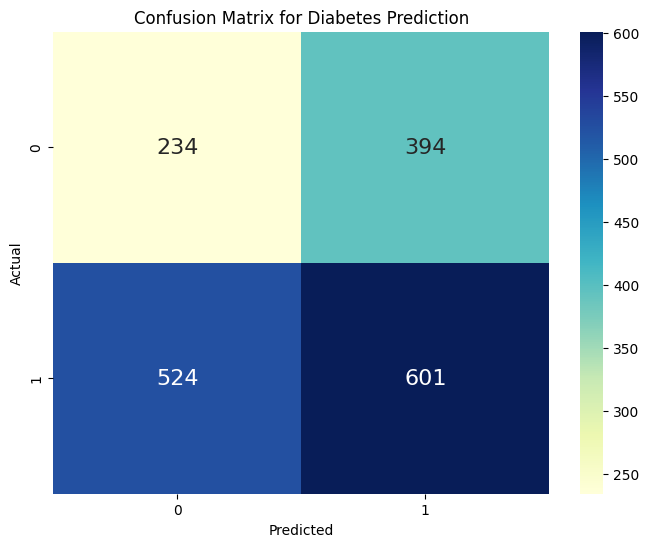

time: 78 ms (started: 2023-12-14 19:50:42 -05:00)


In [75]:
# Get the confusion matrix
conf_matrix_diab = confusion_matrix(y_test_diab, y_pred_diab)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_diab, annot=True, cmap="YlGnBu", fmt='g', annot_kws={"size": 16})

# Adding labels, title, and ticks
plt.title('Confusion Matrix for Diabetes Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [76]:
accuracy_obesity = accuracy_score(y_test_obesity, y_pred_obesity)
precision_obesity = precision_score(y_test_obesity, y_pred_obesity)
recall_obesity = recall_score(y_test_obesity, y_pred_obesity)
f1_obesity = f1_score(y_test_obesity, y_pred_obesity)

# Print evaluation metrics
print('Metrics for Obesity Feature')
print("Accuracy:", accuracy_obesity)
print("Precision:", precision_obesity)
print("Recall:", recall_obesity)
print("F1 Score:", f1_obesity)

print(y_pred_obesity[0:9])

Metrics for Obesity Feature
Accuracy: 0.5077010838562465
Precision: 0.5055276381909548
Recall: 0.5755148741418764
F1 Score: 0.5382557517388978
[1 0 1 1 0 1 0 0 1]
time: 0 ns (started: 2023-12-14 19:50:42 -05:00)


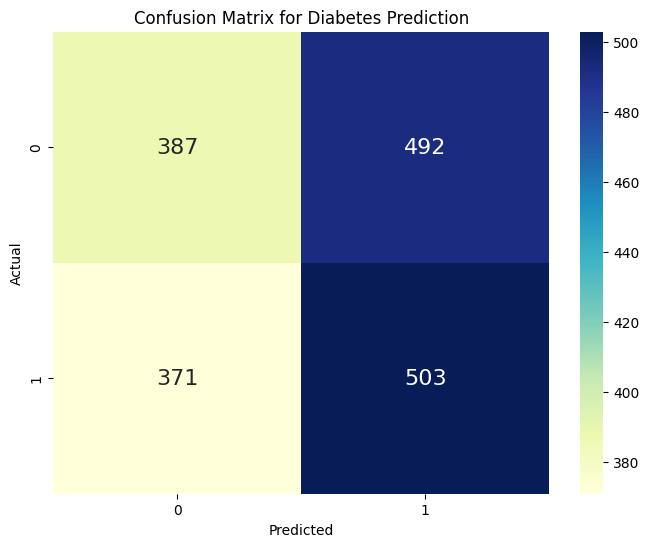

time: 78 ms (started: 2023-12-14 19:50:42 -05:00)


In [77]:
# Get the confusion matrix
conf_matrix_obesity = confusion_matrix(y_test_obesity, y_pred_obesity)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_obesity, annot=True, cmap="YlGnBu", fmt='g', annot_kws={"size": 16})

# Adding labels, title, and ticks
plt.title('Confusion Matrix for Diabetes Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [78]:
file_path = r"C:\Users\aaron\Documents\Python Code\Datasets\Heart Risk Combined Final Dataset.csv"

dataset = pd.read_csv(file_path)

dataset.head()

,Age,Sex,Blood Pressure,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Risk
0,40,M,140,289,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,49,F,160,180,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,37,M,130,283,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,48,F,138,214,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,54,M,150,195,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


time: 16 ms (started: 2023-12-14 19:50:42 -05:00)


In [79]:
dataset['Sex'] = dataset[['Sex']].apply(gender_map)
dataset['Hemisphere'] = dataset[['Hemisphere']].apply(hemisphere_map)
dataset['Country'] = dataset[['Country']].apply(countries_map)
dataset['Diet'] = dataset[['Diet']].apply(diet_map)
dataset['Continent'] = dataset[['Continent']].apply(continent_map)

dataset.head()

,Age,Sex,Blood Pressure,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Risk
0,40,1,140,289,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,49,0,160,180,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,37,1,130,283,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,48,0,138,214,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,54,1,150,195,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


time: 15 ms (started: 2023-12-14 19:50:42 -05:00)


In [80]:
# Assume you have a pre-trained logistic regression model named 'logistic_regression_model'

def fill_missing_diab(dataset, column_name, trained_model):
    for idx, row in dataset.iterrows():
        if pd.isnull(row[column_name]):
            # Select all non-NaN values in the row
            features = row.iloc[:5] # Select only the first five columns as features because they are the shared features
            # Stack a '1' at the beginning of the resulting vector
            features = np.hstack(([1], features))
            features_array = features.reshape(1, -1)  # Reshape as a 2D array for prediction
            predicted_value = trained_model.predict(features_array)[0]
            dataset.at[idx, column_name] = predicted_value

def fill_missing_obesity(dataset, column_name, trained_model):
    for idx, row in dataset.iterrows():
        if pd.isnull(row[column_name]):
            # Select all non-NaN values in the row
            features = row.iloc[:5]
            # Stack a '1' at the beginning of the resulting vector
            features = np.hstack(([1], features))
            features_array = features.reshape(1, -1)  # Reshape as a 2D array for prediction
            predicted_value = trained_model.predict(features_array)[0]
            dataset.at[idx, column_name] = predicted_value

time: 0 ns (started: 2023-12-14 19:50:42 -05:00)


In [81]:
# Replace 'Your_Column_Name' with the column name to be filled
fill_col_diab = 'Diabetes'
# Replace 'logistic_regression_model' with your pre-trained logistic regression model
fill_missing_diab(dataset, fill_col_diab, logistic_diab)

# Replace 'Your_Column_Name' with the column name to be filled
fill_col_obesity = 'Obesity'
# Replace 'logistic_regression_model' with your pre-trained logistic regression model
fill_missing_obesity(dataset, fill_col_obesity, logistic_obesity)

dataset.head()

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

time: 63 ms (started: 2023-12-14 19:50:42 -05:00)
